***
# **<p style="text-align: center;">LAB 2: Computational Statistics</p>**
### <p style="text-align: center;">- Emilio PICARD -</p>

***

## **Setup**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

In [3]:
np.random.seed(1234)

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# **Exercise 1**

In [4]:
# Question 2
from _utils_ import get_samples

# Question 3
n = 10 # number of candidates
x_cand = np.array([i for i in range(n)]) # values of the candidates
prob_samples = np.random.rand(n)
probs = prob_samples / np.sum(prob_samples)

N = 10000 # number of samples
samples = get_samples(x_cand, prob=probs, N=N)

#### **Theoritical vs Empirical distribution**

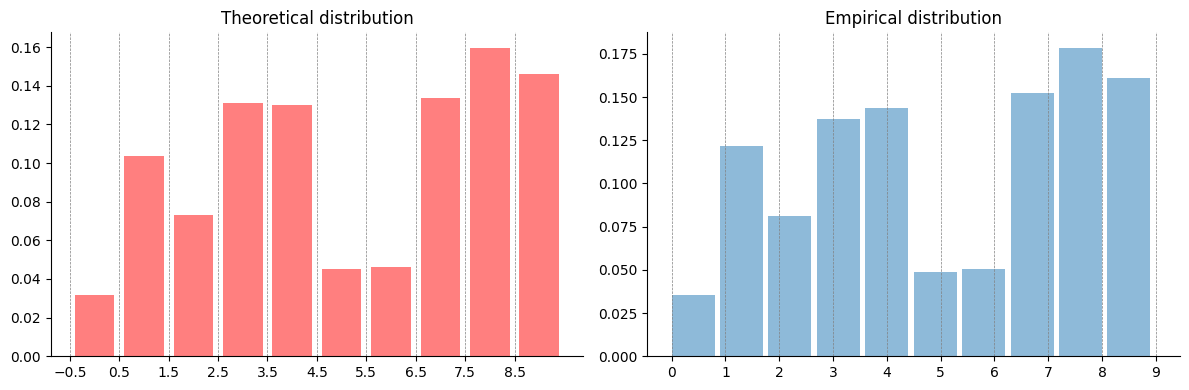

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('Theoretical distribution')
ax[0].bar(x_cand, probs, color='red', alpha=0.5)
ax[0].set_xticks(ticks=x_cand-1/2)
ax[0].xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax[1].set_title('Empirical distribution')
ax[1].hist(samples, bins=n, density=True, alpha=0.5, width=.8)
ax[1].set_xticks(ticks=x_cand)
ax[1].xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# **Exercise 2**

In [6]:
from _utils_ import GaussianMixtureModel

### Samples of the gaussian mixture model

In [7]:
N = 1000

X1 = np.random.multivariate_normal([0, 0], [[5, 4.5], [4.5, 5]], N // 3)
X2 = np.random.multivariate_normal([6, 3], [[1.5, -1], [-1, 1.5]], N // 3)
X3 = np.random.multivariate_normal([3, 8], [[4, -3.8], [-3.8, 4]], N // 3)
X = np.vstack([X1, X2, X3])

### **EM Algorithm**

In [8]:
gmm = GaussianMixtureModel(n_clusters=3, dim=2, max_iters=100)
gmm.fit(X)

Convergence atteinte à l'itération 31


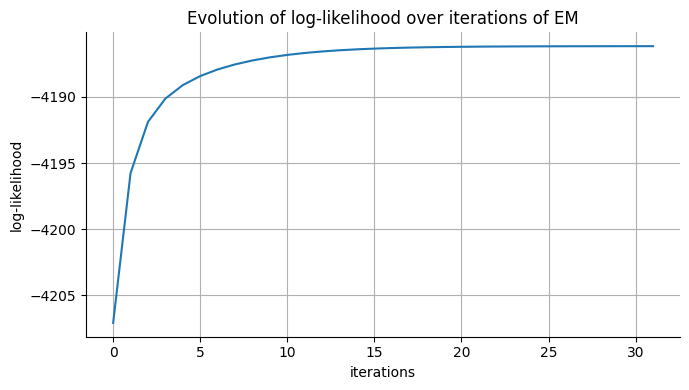

In [9]:
fig = plt.figure(figsize=(7, 4))
plt.plot(gmm.log_likelihoods)
plt.title("Evolution of log-likelihood over iterations of EM")
plt.xlabel('iterations')
plt.ylabel('log-likelihood')
plt.tight_layout()
plt.grid(True)
plt.show()

In [10]:
hat_mus = gmm.mus
hat_sigmas = gmm.sigmas
hat_alphas = gmm.alphas

alpha = np.array([0.33, 0.33, 0.33])
sigmas = np.array([[[5, 4.5], [4.5, 5]], [[1.5, -1], [-1, 1.5]], [[4, -3.8], [-3.8, 4]]])
mus = np.array([[0, 0], [6, 3], [3, 8]])

print(f"distance between true and estimated alphas: {np.linalg.norm(alpha - hat_alphas)}")
print(f"distance between true and estimated mus: {np.linalg.norm(mus - hat_mus)}")
print(f"distance between true and estimated sigmas: {np.linalg.norm(sigmas - hat_sigmas)}")

predictions = gmm.predict(X)

distance between true and estimated alphas: 0.01666208427054064
distance between true and estimated mus: 0.43600462068922796
distance between true and estimated sigmas: 0.8706245401882036


In [11]:
from _utils_ import plot_results

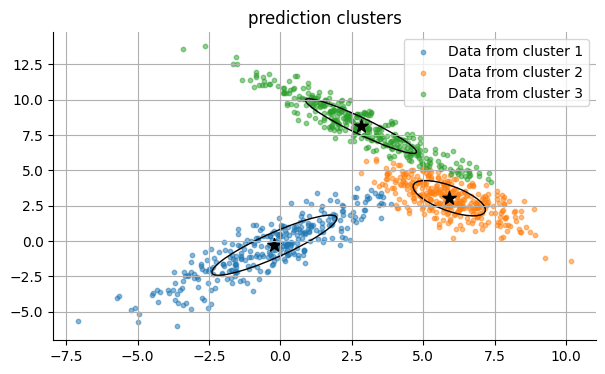

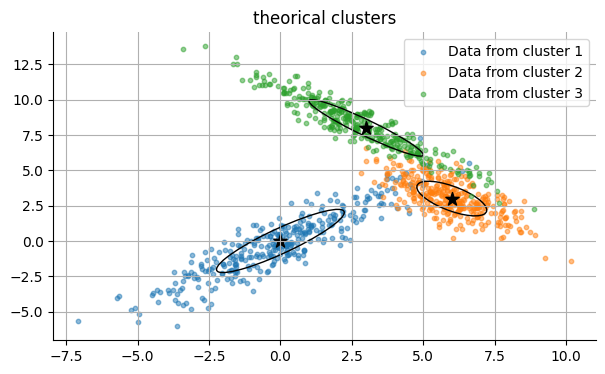

<Figure size 640x480 with 0 Axes>

In [12]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

n_clusters = 3
title = "prediction clusters"
plot_results(n_clusters, X, gmm.predict(X), hat_mus, hat_sigmas, title)
z_0 = np.zeros(N//3)
z_1 = np.ones(N//3)
z_2 = np.ones(N//3) * 2
z = np.hstack((z_0, z_1, z_2)).squeeze()

title = "theorical clusters"
plot_results(n_clusters, X, z, mus, sigmas, title)
plt.tight_layout()
plt.show()

**Question 5: APPLICATION**

In [13]:
import pandas as pd
from _utils_ import compute_bic

df = pd.read_csv('WPP2024_Demographic_Indicators_Medium.csv', low_memory=False)[['CBR', 'CDR']].dropna()
X = df.to_numpy()
n_samples, n_dims = X.shape

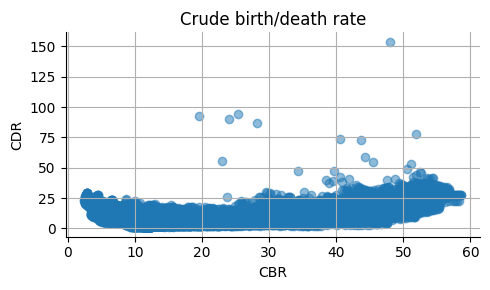

In [14]:
# Plottting the dataset
plt.figure(figsize=(5,3))
plt.title('Crude birth/death rate')
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel('CBR')
plt.ylabel('CDR')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
n_clust_max = 6
bic_scores = []
gmm_models = []
for n_clusters in range(1, n_clust_max + 1):
    gmm = GaussianMixtureModel(n_clusters=n_clusters, dim=n_dims, max_iters=100)
    gmm.fit(X)
    gmm_models.append(gmm)
    bic_scores.append(compute_bic(X, gmm))

Convergence atteinte à l'itération 1
Convergence atteinte à l'itération 54


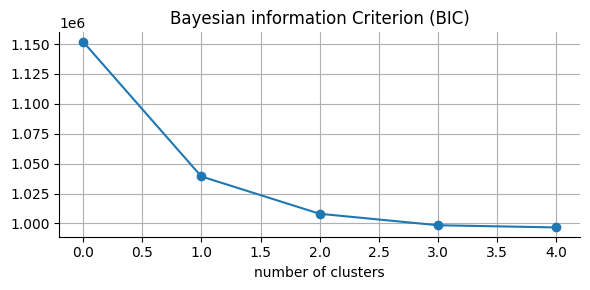

In [17]:
fig = plt.figure(figsize=(6, 3))
plt.plot(bic_scores, marker='o')
plt.title('Bayesian information Criterion (BIC)')
plt.xlabel('number of clusters')
plt.grid()
plt.tight_layout()
plt.show()

Le tracé de la métrique BIC montre que le modèle GMM  n'est pas vraiment adapté pour modéliser ces données.

In [19]:
idx_before_overfitting = 3
best_m = idx_before_overfitting + 1
print(f"Optimal number of clusters (based on BIC): {best_m}")

Optimal number of clusters (based on BIC): 4


In [20]:
from scipy.stats import multivariate_normal

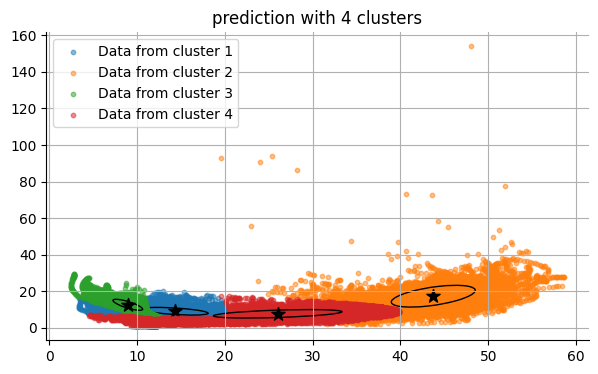

In [21]:
best_gmm = gmm_models[idx_before_overfitting]
plot_results(n_clusters=4,
             X=X,
             z=best_gmm.predict(X),
             mu=best_gmm.mus,
             sigma=best_gmm.sigmas,
             title=f'prediction with {best_m} clusters')

# **Exercice 3**: Importance sampling

In [22]:
from _utils_ import p, q, f

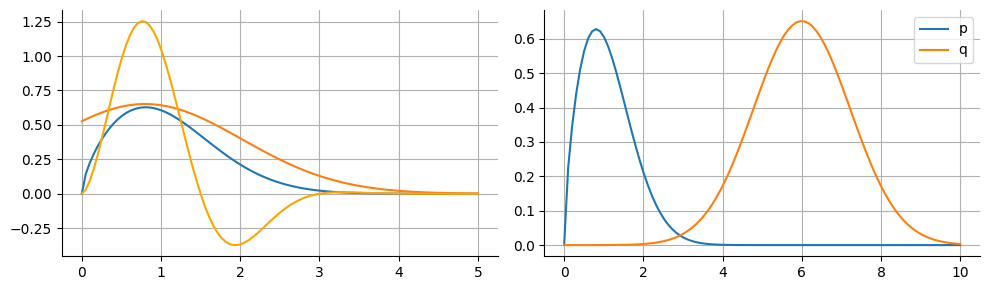

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

x = np.linspace(0, 5, 100)
ax[0].plot(x, p(x), label='p')
ax[0].plot(x, q(x, 0.8, 1.5), label='q')
ax[0].plot(x, p(x)*f(x), label=r'$p \times f$', color='orange')
ax[0].grid()

x = np.linspace(0, 10, 100)
ax[1].plot(x, p(x), label='p')
ax[1].plot(x, q(x, 6, 1.5), label='q')
ax[1].grid()

plt.legend()
plt.tight_layout()
plt.show()

### **3.A - Poor importance sampling**

In [24]:
from _utils_ import sample_importance_sampling

# In order to compute the mean and the variance of this estimator,
# we will compute 200 times the estimator, for N = [10, 100, 10^3, 10^4].

num_n = 200
N = [10, 100, 1000, 10000]
q_params = np.array([0.8, 1.5])

importance_weights_1 = []
means, vars = [], []

for n_samples in N:
    ests = []
    for _ in range(num_n):
        samples1, sampling_est, weights = sample_importance_sampling(n_samples, f, p, q, q_params)
        ests.append(sampling_est)
    means.append(np.mean(ests))
    vars.append(np.var(ests))
    # we just take the last estimation to store the weights
    importance_weights_1.append([weights])

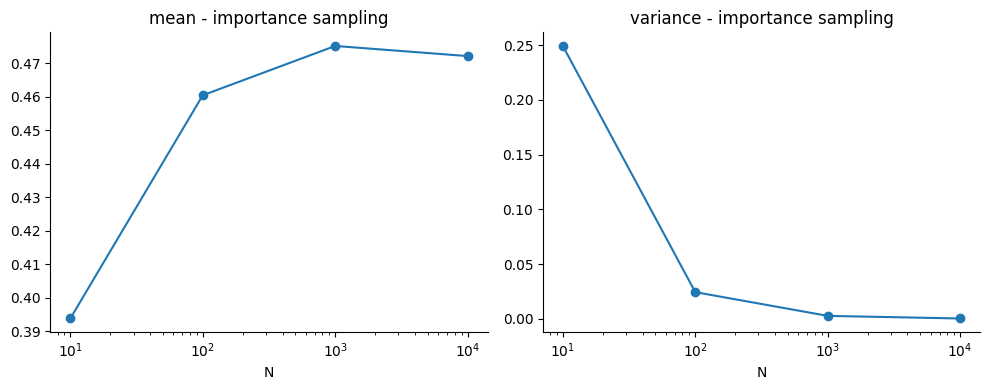

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_title('mean - importance sampling')
ax[0].set_xlabel('N')
ax[0].plot(N, means, marker='o')
ax[0].set_xscale('log')

ax[1].set_title('variance - importance sampling')
ax[1].set_xlabel('N')
ax[1].plot(N, vars, marker='o')
ax[1].set_xscale('log')

plt.tight_layout()
plt.show()

In [26]:
# same but for mu = 6 (mean param of q distribution)
q_params = np.array([6, 1.5])
importance_weights_2 = []

means, vars = [], []
for n_samples in N:
    ests = []
    for _ in range(num_n):
        samples2, sampling_est, weights = sample_importance_sampling(n_samples, f, p, q, q_params)
        ests.append(sampling_est)
    means.append(np.mean(ests))
    vars.append(np.var(ests))
    
    importance_weights_2.append([weights])

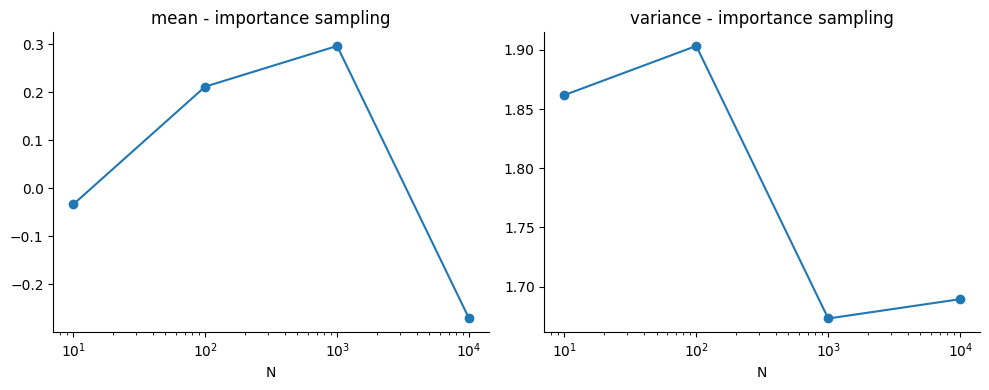

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_title('mean - importance sampling')
ax[0].set_xlabel('N')
ax[0].plot(N, means, marker='o')
ax[0].set_xscale('log')

ax[1].set_title('variance - importance sampling')
ax[1].set_xlabel('N')
ax[1].plot(N, vars, marker='o')
ax[1].set_xscale('log')

plt.tight_layout()
plt.show()

In [28]:
# This cell shows us that almost every wheights are zero unless some of them really big

np.squeeze(importance_weights_2[2]) * (np.squeeze(importance_weights_2[2]) > 10)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [29]:
import seaborn as sns

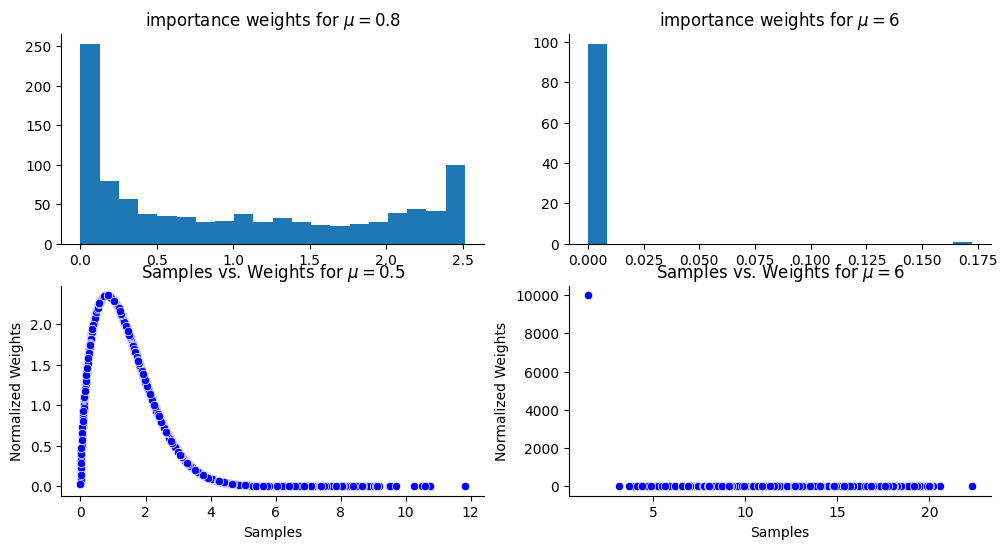

In [30]:
# compare between weights1 and weights2
fig, ax = fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# we fix N at a sufficient sampling rate
# N = 1000

ax[0, 0].hist(importance_weights_1[2], bins=20)
ax[0, 0].set_title(r'importance weights for $\mu = {0.8}$')

ax[0, 1].hist(np.squeeze(importance_weights_2[2])[:100], bins=20)
ax[0, 1].set_title(r'importance weights for $\mu = {6}$')

sns.scatterplot(x=samples1, y=importance_weights_1[-1][0], ax=ax[1, 0], color='blue')
ax[1, 0].set_title(r'Samples vs. Weights for $\mu = 0.5$')
ax[1, 0].set_xlabel('Samples')
ax[1, 0].set_ylabel('Normalized Weights')

sns.scatterplot(x=samples2, y=importance_weights_2[-1][0], ax=ax[1, 1], color='blue')
ax[1, 1].set_title(r'Samples vs. Weights for $\mu = 6$')
ax[1, 1].set_xlabel('Samples')
ax[1, 1].set_ylabel('Normalized Weights')

plt.show()

### **3.B - Adaptive importance sampling**

In [31]:
from _utils_ import PopulationMonteCarlo

dim = 5
n_clusters = 5
n_samples = 2000
pmc = PopulationMonteCarlo(n_samples, n_clusters, dim, b=0.4, max_iters=150)

In [32]:
pmc.fit()

In [44]:
from _utils_ import get_gmm_samples
X, z = get_gmm_samples(n_clusters, pmc.alphas, pmc.mus, pmc.sigmas, n_samples)

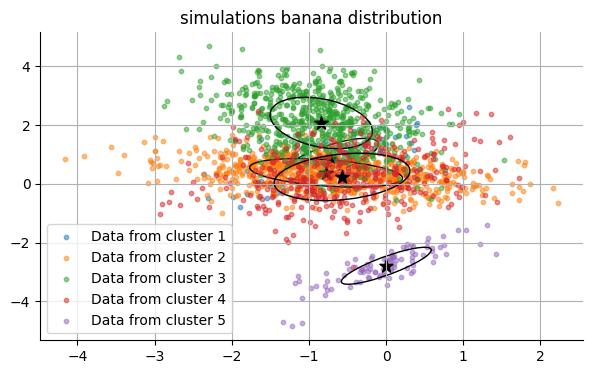

In [45]:
plot_results(n_clusters, X[:,:2], z, pmc.mus[:, :2], pmc.sigmas[:, :2, :2], title=f'simulations banana distribution')

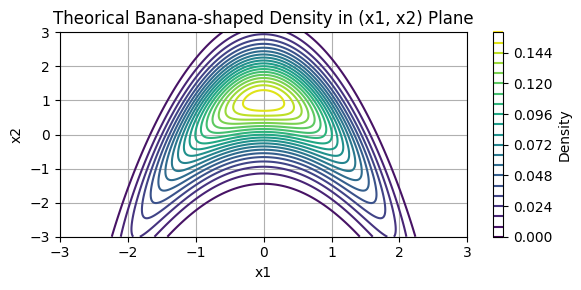

In [5]:
def banana_distribution(x1, x2, b=1, sigma1_squared=1):
    """Compute the transformed coordinate x2 for the banana-shaped distribution."""
    return x2 + b * (x1**2 - sigma1_squared)

x1_range = np.linspace(-3, 3, 400)
x2_range = np.linspace(-3, 3, 400)
x1, x2 = np.meshgrid(x1_range, x2_range)

x2_transformed = banana_distribution(x1, x2)

sigma = 1
normalizing_factor = 1 / (2 * np.pi * sigma**2)

density = normalizing_factor * np.exp(-0.5 * (x1**2 + x2_transformed**2))

plt.figure(figsize=(6, 3))
plt.contour(x1, x2, density, levels=20, cmap='viridis')
plt.title("Theorical Banana-shaped Density in (x1, x2) Plane")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label='Density')
plt.grid()
plt.tight_layout()
plt.show()